# GENDER RECOGNITION USING CONVOLUTIONAL NEURAL NETWORKS

The face recognition dataset has been extracted from https://www.kaggle.com/datasets/maciejgronczynski/biggest-genderface-recognition-dataset

The aim of thos little script is to create a basic Convolutional netwrok to predict based in a face image the gender of the image.

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from skimage import color
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import pickle
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

Let's import images and split them in train and validation:


In [152]:
labels = ['man', 'woman']
img_size = 64
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)



In [153]:
data = get_data('/Users/felixbarenysmarimon/Desktop/PROJECT/Deep Leaning/faces')

'NoneType' object is not subscriptable


Visualize the data

/Users/felixbarenysmarimon/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

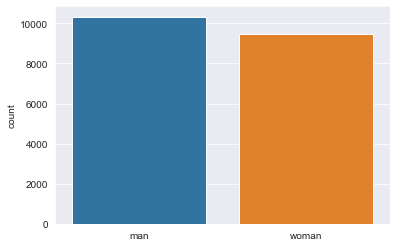

In [155]:
import seaborn as sns
l = []
for i in data:
    if(i[1] == 0):
        l.append("man")
    else:
        l.append("woman")
sns.set_style('darkgrid')
sns.countplot(l)

Now let's randomize the vector

In [156]:
l=np.random.shuffle(l)

Let's visualize a random sample:

Text(0.5, 1.0, 'woman')

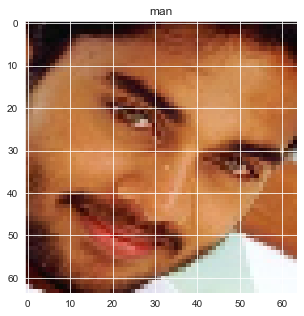

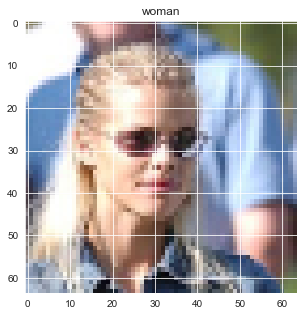

In [181]:
import random
man=random.sample(range(1,19823),1)[0]
plt.figure(figsize = (5,5))
plt.imshow(data[man][0])
plt.title(labels[data[man][1]])
woman=random.sample(range(1,19823),1)[0]
plt.figure(figsize = (5,5))
plt.imshow(data[woman][0])
plt.title(labels[data[woman][1]])

In [164]:
images = []
labels = []

for feature, label in data:
  images.append(feature)
  labels.append(label)

# Normalize the data
images = np.array(images) / 255

images.reshape(-1, img_size, img_size, 1)
labels = np.array(labels)

In [165]:
images.shape

(19823, 64, 64, 3)

split into train and vaidation

In [166]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_label,test_label = train_test_split(images, labels, test_size=0.1, random_state=13)

Now we develop a neural network:

In [11]:
#Now we can develop the model

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam


model = tf.keras.models.Sequential([
    # 1st conv
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(64, 64, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    # 2nd conv
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     # 3rd conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 4th conv
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    # 5th Conv
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
  # To Flatten layer
  tf.keras.layers.Flatten(),
  # To FC layer 1
  tf.keras.layers.Dense(4096, activation='relu7'),
  tf.keras.layers.Dropout(0.5),
  #To FC layer 2
  tf.keras.layers.Dense(4096, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1, activation='sigmoid')
  ])

In [12]:
# Compilation of the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
   )
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 96)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         2973952   
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 256)        1024      
 hNormalization)                                                 
                                                        

Execute it

In [167]:
from tensorflow.keras.callbacks import EarlyStopping
custom_early_stopping = EarlyStopping(
 monitor='accuracy', 
    patience=5, 
    min_delta=0.001, 
    mode='max')

# Let's train the model:
hist = model.fit(train_X,train_label,
                     validation_split=0.1,
                    epochs=2,
                    callbacks=[custom_early_stopping])

Epoch 1/2
502/502 [==============================] - 1206s 2s/step - loss: 0.3872 - accuracy: 0.8393 - val_loss: 0.3819 - val_accuracy: 0.8223
Epoch 2/2
502/502 [==============================] - 1568s 3s/step - loss: 0.3011 - accuracy: 0.8753 - val_loss: 0.4034 - val_accuracy: 0.8453


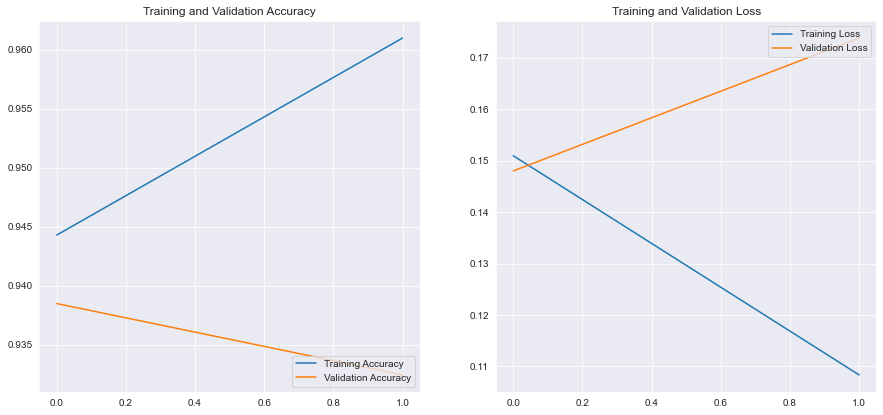

In [77]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(2)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
from sklearn.metrics import classification_report
predictions = model.predict(test_X)
predictions = predictions.reshape(1,-1)[0]
predictions=np.around(predictions,0)
print(classification_report(test_label, predictions, target_names = ['Men(Class 0)','Woman (Class 1)']))

NameError: name 'test_X' is not defined

# Let's see how it works

Let's import first an image:

In [12]:
img_size = 64
path= "/Users/felixbarenysmarimon/Desktop/pict/face.jpg"
img1 = cv2.imread(path)[...,::-1] #convert BGR to RGB format
img1 = cv2.resize(img1, (img_size, img_size)) # Reshaping images to preferred size
img=img1.reshape(-1, img_size, img_size, 3)
img.size

12288

Text(0.5, 1.0, 'man')

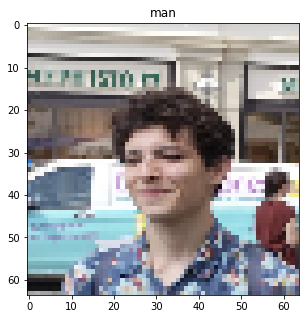

In [13]:
import random
fig_ran=random.sample(range(1,img.size),1)[0]
labels=["man","woman"]
prediction= model.predict(img)
prediction=np.around(prediction,0)
prediction=(int(prediction[0]))
plt.figure(figsize = (5,5))
plt.imshow(img[0])
plt.title(labels[prediction])


## Saving the model (to avoid losing the last trainig of parameters) and recovering it:

If we want to save the model:

In [21]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://44e1513b-deda-4057-8b59-2cc39ad30d26/assets


Get the model last saved:

In [4]:
import pickle
# load the model from disk
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
hist=loaded_model
model=loaded_model.model